In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

In [4]:
df = pd.read_csv("../output/Final_Dataset.csv",encoding = "ISO-8859-1")
df = df.dropna() 
df.head(5)

,Unnamed: 0,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal_(Y/N),Time,Species,original_order,Continent
0,0,Jun,2018.0,Boat,usa,California,"Oceanside, San Diego County",Rare_act.,F,57.0,N,night,White shark,6303.0,North_America
1,1,Jun,2018.0,Unprovoked,usa,Georgia,"St. Simon Island, Glynn County",Seashore,F,11.0,N,afternoon,Unespcific,6302.0,North_America
2,2,Jun,2018.0,Invalid,usa,Hawaii,"Habush, Oahu",Surf,M,48.0,N,day-morning,Unespcific,6301.0,North_America
6,6,Jun,2018.0,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Swim,M,18.0,Y,afternoon,Tiger shark,6297.0,South_America
8,8,May,2018.0,Unprovoked,usa,Florida,"Cocoa Beach, Brevard County",Seashore,M,15.0,N,afternoon,Lemon shark,6295.0,North_America


# Testing hypothesis:
 

### 1. What is the continent with more sharks attacks in 2018?

In [ ]:
attacks_y_c = df.groupby(['Year','Continent'])[['Type']].count()
attacks_y_c = attacks_y_c.sort_values(['Year','Type'], ascending=[False,False])
attacks_y_c.rename(columns={'Type':'Attacks'}, inplace=True)


#### 1.1 Which continent had most attacks reported? (regardless of the  year)

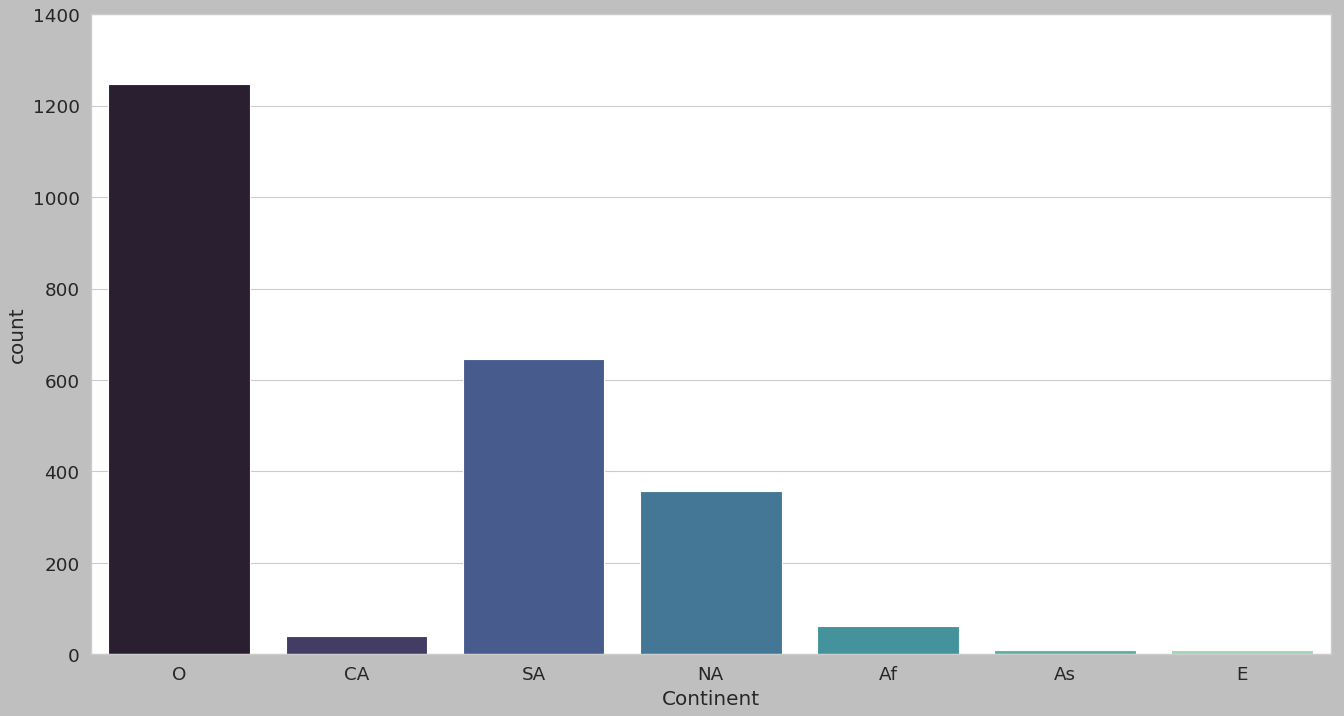

In [7]:
continents = ['O', 'CA', 'SA','NA', 'Af', 'As', 'E']
plt.figure(figsize=(20,10)) 

sns.set(style="whitegrid", font_scale = 1.5) # to change the size of letters

Fig_1 = sns.countplot(x="Continent", palette="mako",  data = df[-(df.Continent == ('Unknown'))])
'''
data = df[-(df.Continent == ('Unknown'))]
this part of code indicates that the data used with the dataframe but eliminating the data corresponding to "Unknown"
'''

Fig_1.set_xticklabels(continents) # To change the labels of the x axis

def propotions(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

propotions(Fig_1, df.Continent)

Fig_1.figure.savefig("Fig_1_continent.jpg", dpi=300) #To save the figure

###### 1.2 There are some relationship between type of activity and continent? 

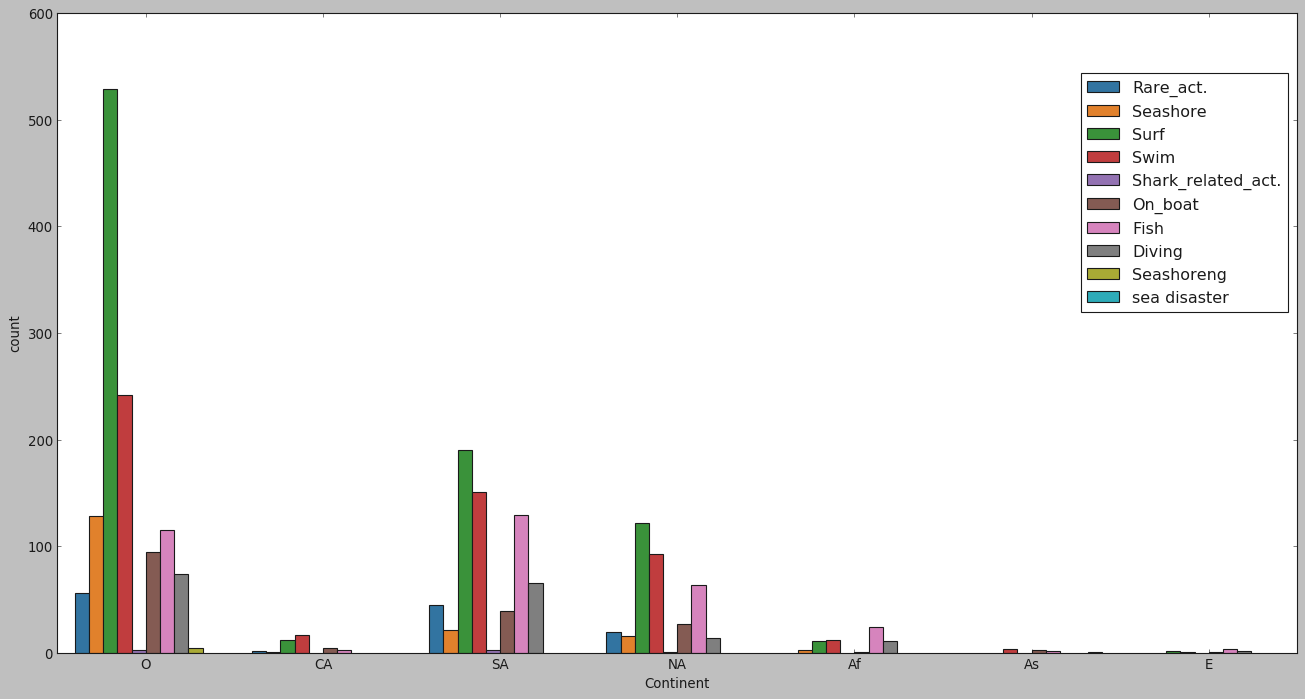

In [9]:
plt.figure(figsize=(20,10))
plt.style.use('_classic_test')


Fig_2 = sns.countplot(x="Continent", hue = "Activity", palette="tab10",  data = df[-(df.Continent == ('Unknown'))])
Fig_2.set_xticklabels(continents)

plt.legend(bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes) # to move the legend top-right

Fig_2.figure.savefig("Fig_2_continent_vs_activity.jpg", dpi=300)

In the figure we could see that the main attacks occur during surfing activities followed by swiming activities. 

### 2. Are there more attacks on men or women?
What gender was more commonly attacked?

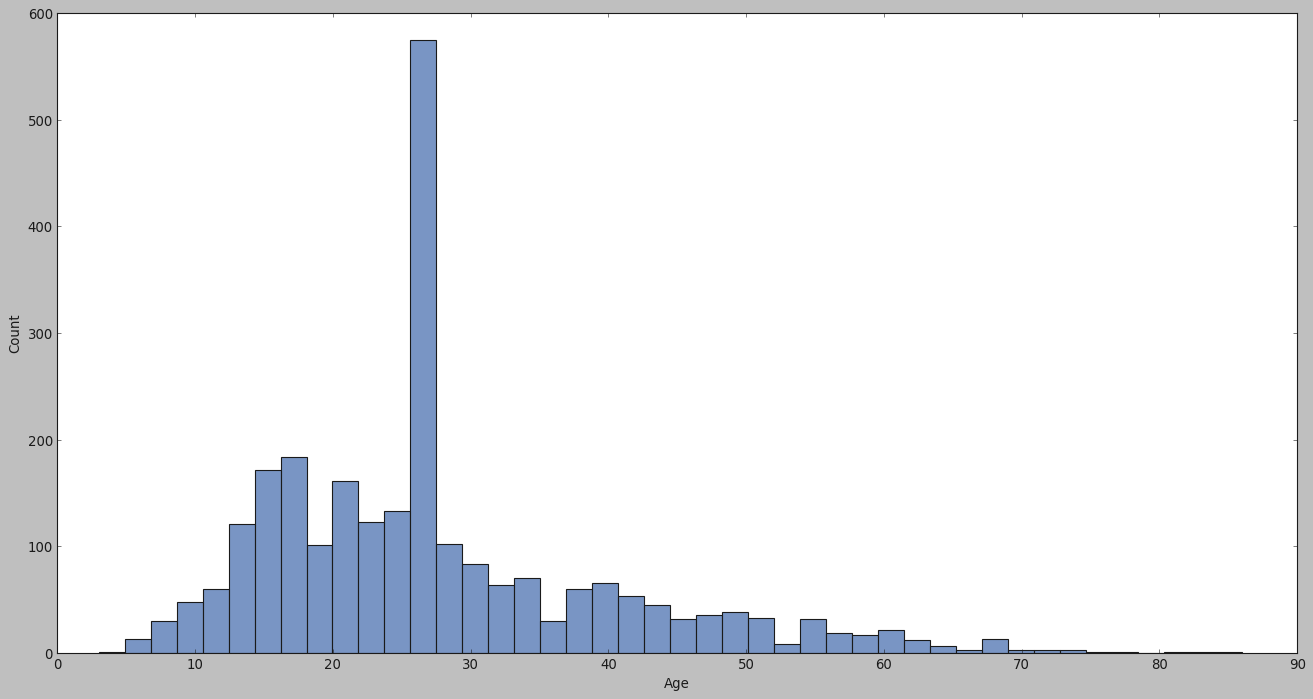

In [11]:
plt.figure(figsize=(20,10))
plt.style.use('_classic_test')

Fig_3 = sns.histplot(x = "Age", data = df, palette = "mako")
Fig_3.figure.savefig("Fig_3_age.raw", dpi=300)

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('_classic_test')
plt.figure(facecolor="white")

print(plt.style.available) # to get all the styles in matplotlib

'''
['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 
'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper',
'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn',
'Solarize_Light2', 'tableau-colorblind10', '_classic_test']
 '''

gender = sns.countplot(x = "Sex", data = df, palette = "mako")
gender.figure.savefig("gender.jpg", dpi=300)

###### 3.1 There are differences between Fatal attack and sex? 

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


<Figure size 1600x800 with 0 Axes>

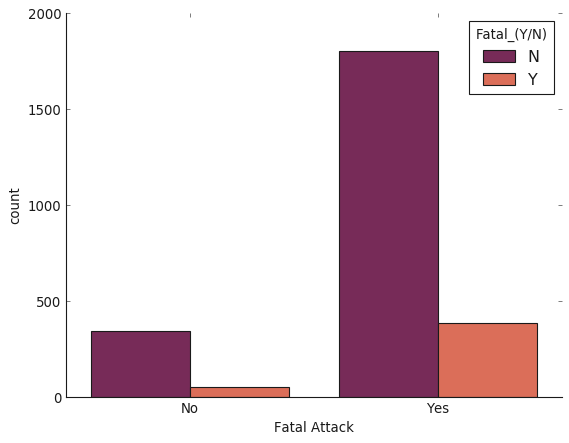

In [20]:
plt.figure(figsize=(20,10)) 
plt.style.use('_classic_test')
plt.figure(facecolor="white") # to remove the grey background
fatal = ['No', 'Yes']

#To known all the possible styles to apply to figures
print(plt.style.available)

Fig_3= sns.countplot(data=df, x="Sex", hue="Fatal_(Y/N)", palette = "rocket")

# Hide the right and top spines
Fig_3.spines['right'].set_visible(False)
Fig_3.spines['top'].set_visible(False)
Fig_3.set_xticklabels(fatal)
Fig_3.set_xlabel('Fatal Attack')

Fig_3.figure.savefig("Fig_3_gender.jpg", dpi=300)

### 3. When there are more sharks attacks?

<Figure size 1600x800 with 0 Axes>

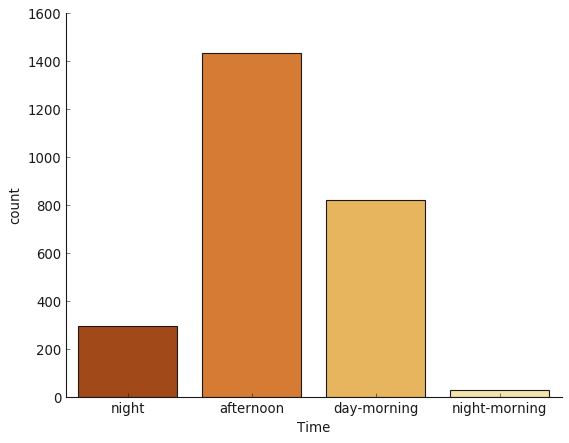

In [18]:
plt.figure(figsize=(20,10)) 
plt.style.use('_classic_test')
plt.figure(facecolor="white")

Fig_4 = sns.countplot(x = "Time", data = df, palette = "YlOrBr_r") # la "r" despues de YlOrBr es para invertir la paleta

#To remove the top and right axis:
Fig_4.spines['right'].set_visible(False)
Fig_4.spines['top'].set_visible(False)

#To remove top and right ticks
plt.tick_params(axis = "x", which = "both", bottom = True, top = False)
plt.tick_params(axis = "y", which = "both", bottom = True, right= False)

Fig_4.figure.savefig("Fig_4_time.jpg", dpi=300)

### 4. Relation between species and type of attacks/Fatal/Time

###### 4.1. Relation of species with some variables

<Figure size 1600x800 with 0 Axes>

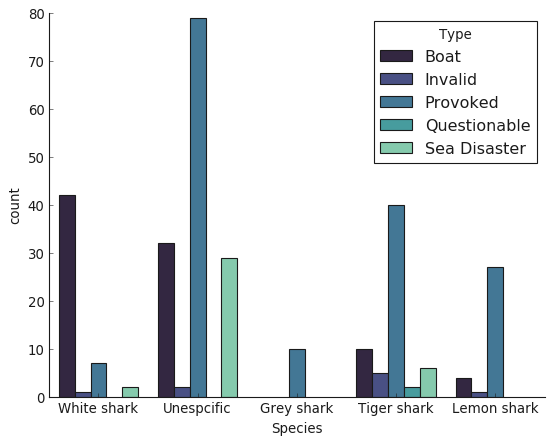

In [23]:
##### SPECIES VS TYPE OF ATTACK #####
plt.figure(figsize=(20,10)) 
plt.style.use('_classic_test')
plt.figure(facecolor="white")

Fig_5 = sns.countplot(x = "Species", hue = "Type", palette = "mako", data = df[-(df.Type == ('Unprovoked'))])

Fig_5.spines['right'].set_visible(False) # To remove the right axis
Fig_5.spines['top'].set_visible(False) # To remove the top axis
plt.tick_params(axis = "x", which = "both", bottom = True, top = False) # To remove the right ticks
plt.tick_params(axis = "y", which = "both", bottom = True, right= False) # To remove the top ticks

Fig_5.figure.savefig("Fig_5_Species_vs_Typeattack.jpg", dpi=300)

<Figure size 1600x800 with 0 Axes>

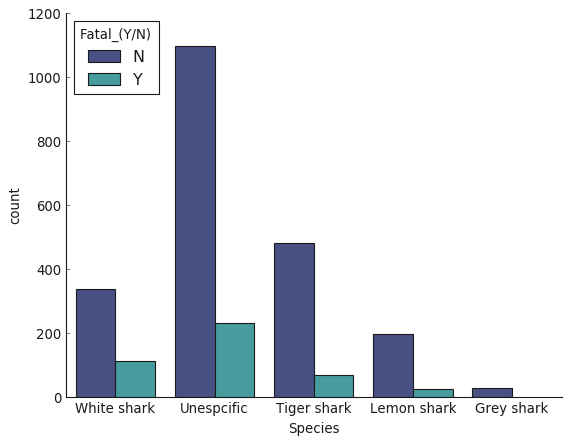

In [19]:
##### SPECIES VS FATAL #####
plt.figure(figsize=(20,10)) 
plt.style.use('_classic_test')
plt.figure(facecolor="white")

Fig_6 = sns.countplot(x = "Species", hue = "Fatal_(Y/N)",palette = "mako", data = df)

Fig_6.spines['right'].set_visible(False)
Fig_6.spines['top'].set_visible(False)
plt.tick_params(axis = "x", which = "both", bottom = True, top = False)
plt.tick_params(axis = "y", which = "both", bottom = True, right= False)

Fig_6.figure.savefig("Fig_6_Species_vs_Fatal.jpg", dpi=300)

Regardless of species, attacks are not letha

<Figure size 1600x800 with 0 Axes>

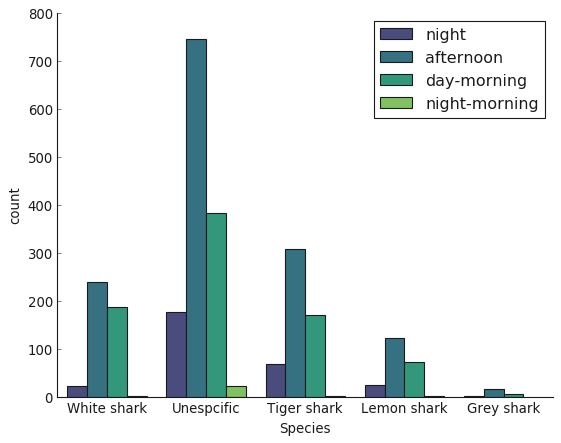

In [25]:
##### SPECIES VS TIME #####
plt.figure(figsize=(20,10)) 
plt.style.use('_classic_test')
plt.figure(facecolor="white")

Fig_7 = sns.countplot(x = "Species", hue = "Time", palette = "viridis", data = df)

Fig_7.spines['right'].set_visible(False)
Fig_7.spines['top'].set_visible(False)
plt.tick_params(axis = "x", which = "both", bottom = True, top = False)
plt.tick_params(axis = "y", which = "both", bottom = True, right= False)

plt.legend(bbox_to_anchor=(1, 1), bbox_transform=Fig_7.transAxes)

Fig_7.figure.savefig("Fig_7_Species_vs_Time.jpg", dpi=300)